In [11]:
import os
import time
import multiprocessing as mp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import func4behav as fb
import itertools
import ast
import imp
imp.reload(fb)

<module 'func4behav' from 'c:\\Users\\Tianyi Zheng\\OneDrive - neuron.t.u-tokyo.ac.jp\\Documents\\zheng\\mywork\\attention_tES\\tes-attention\\processing\\behavior\\func4behav.py'>

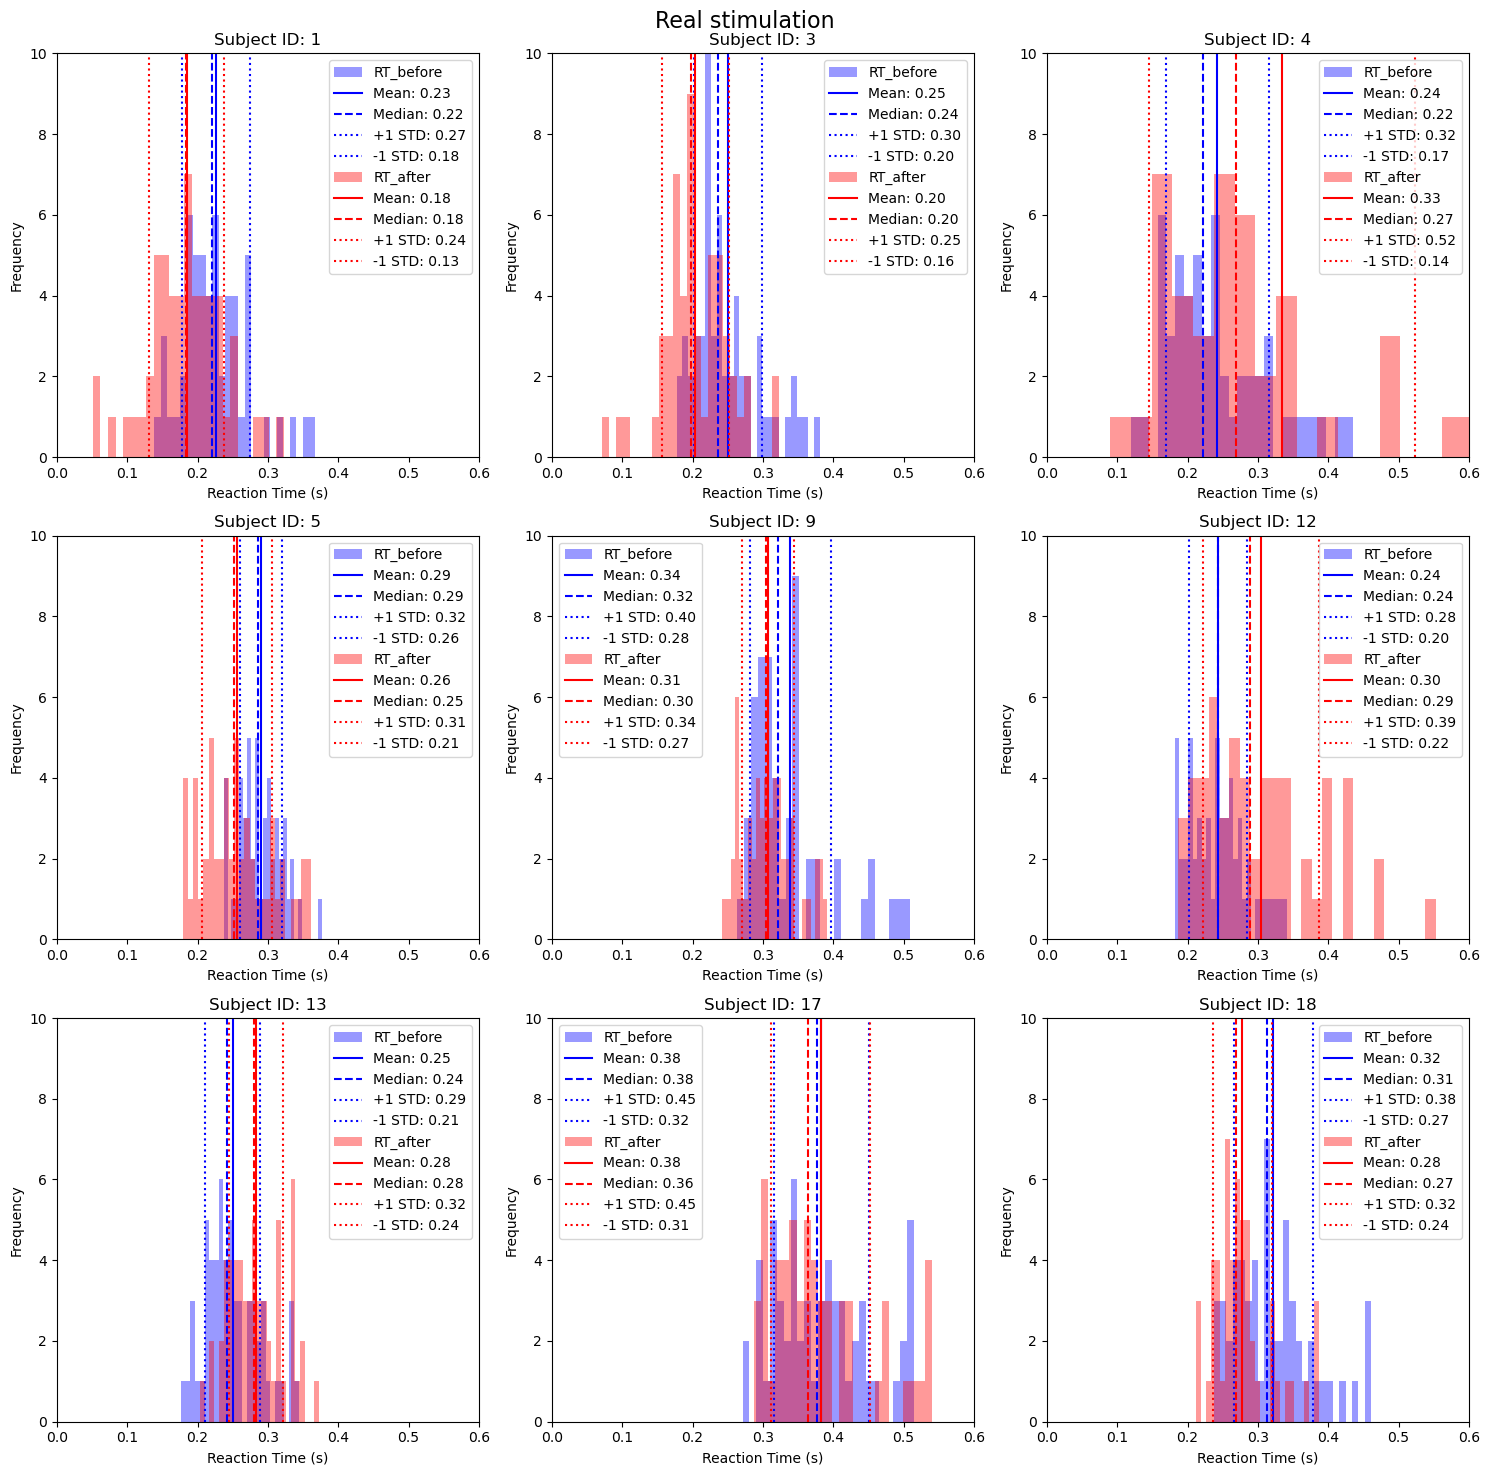

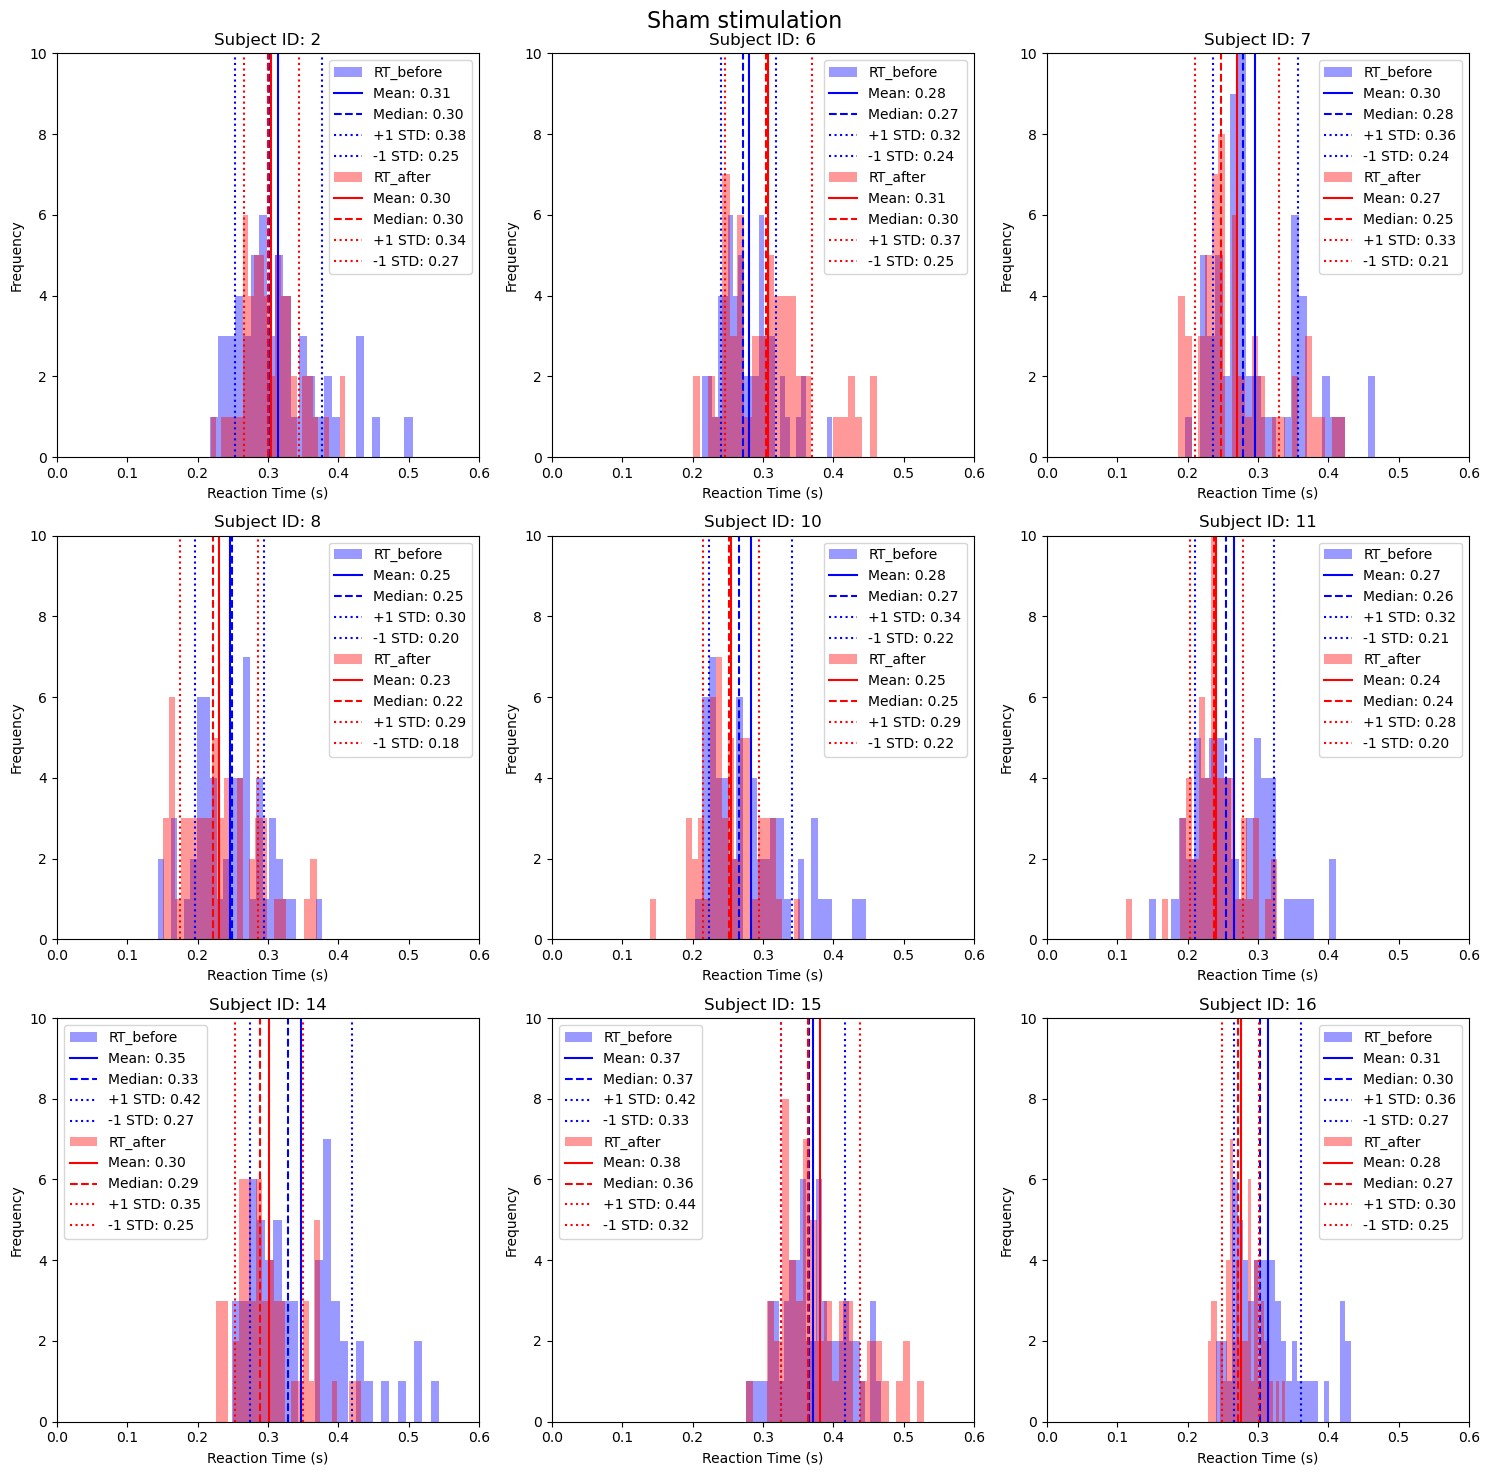

In [12]:
all_real = [1, 3, 4, 5, 9, 12, 13, 17, 18]
all_sham = [2, 6, 7, 8, 10, 11, 14, 15, 16]
bin_size = 25
xmax = 0.6
ymax = 10

fig_real, axs_real = plt.subplots(3, 3, figsize=(15, 15))
fig_real.suptitle('Real stimulation', fontsize=16)
fig_sham, axs_sham = plt.subplots(3, 3, figsize=(15, 15))
fig_sham.suptitle('Sham stimulation', fontsize=16)

axs_real = axs_real.ravel()
axs_sham = axs_sham.ravel()

for idx, subject_id in enumerate(all_real):
    behavior_before, behavior_after = fb.load_behavior(subject_id)
    behavior_before = behavior_before[(behavior_before['response'] == 1) & (behavior_before['reaction time'] > 0.05) & (behavior_before['type'] == 1)]
    behavior_after = behavior_after[(behavior_after['response'] == 1) & (behavior_after['reaction time'] > 0.05) & (behavior_before['type'] == 1)]
    behavior_before = fb.remove_outlier(behavior_before)
    behavior_after = fb.remove_outlier(behavior_after)
    RT_before = behavior_before['reaction time'].values
    RT_after = behavior_after['reaction time'].values

    mu_before, median_before, sigma_before = np.mean(RT_before), np.median(RT_before), np.std(RT_before)
    mu_after, median_after, sigma_after = np.mean(RT_after), np.median(RT_after), np.std(RT_after)

    axs_real[idx].hist(RT_before, bins=bin_size, color='blue', alpha=0.4, label='RT_before')
    axs_real[idx].axvline(mu_before, color='blue', linestyle='solid', label=f'Mean: {mu_before:.2f}')
    axs_real[idx].axvline(median_before, color='blue', linestyle='dashed', label=f'Median: {median_before:.2f}')
    axs_real[idx].axvline(mu_before+sigma_before, color='blue', linestyle='dotted', label=f'+1 STD: {mu_before+sigma_before:.2f}')
    axs_real[idx].axvline(mu_before-sigma_before, color='blue', linestyle='dotted', label=f'-1 STD: {mu_before-sigma_before:.2f}')

    axs_real[idx].hist(RT_after, bins=bin_size, color='red', alpha=0.4, label='RT_after')
    axs_real[idx].axvline(mu_after, color='red', linestyle='solid', label=f'Mean: {mu_after:.2f}')
    axs_real[idx].axvline(median_after, color='red', linestyle='dashed', label=f'Median: {median_after:.2f}')
    axs_real[idx].axvline(mu_after+sigma_after, color='red', linestyle='dotted', label=f'+1 STD: {mu_after+sigma_after:.2f}')
    axs_real[idx].axvline(mu_after-sigma_after, color='red', linestyle='dotted', label=f'-1 STD: {mu_after-sigma_after:.2f}')

    axs_real[idx].set(title=f'Subject ID: {subject_id}', ylabel='Frequency', xlabel='Reaction Time (s)')
    axs_real[idx].legend()  # Add a legend

    axs_real[idx].set_xlim([0, xmax])
    axs_real[idx].set_ylim([0, ymax])

for idx, subject_id in enumerate(all_sham):
    behavior_before, behavior_after = fb.load_behavior(subject_id)
    behavior_before = behavior_before[(behavior_before['response'] == 1) & (behavior_before['reaction time'] > 0.05) & (behavior_before['type'] == 1)]
    behavior_after = behavior_after[(behavior_after['response'] == 1) & (behavior_after['reaction time'] > 0.05) & (behavior_before['type'] == 1)]
    behavior_before = fb.remove_outlier(behavior_before)
    behavior_after = fb.remove_outlier(behavior_after)
    RT_before = behavior_before['reaction time'].values
    RT_after = behavior_after['reaction time'].values

    mu_before, median_before, sigma_before = np.mean(RT_before), np.median(RT_before), np.std(RT_before)
    mu_after, median_after, sigma_after = np.mean(RT_after), np.median(RT_after), np.std(RT_after)

    axs_sham[idx].hist(RT_before, bins=bin_size, color='blue', alpha=0.4, label='RT_before')
    axs_sham[idx].axvline(mu_before, color='blue', linestyle='solid', label=f'Mean: {mu_before:.2f}')
    axs_sham[idx].axvline(median_before, color='blue', linestyle='dashed', label=f'Median: {median_before:.2f}')
    axs_sham[idx].axvline(mu_before+sigma_before, color='blue', linestyle='dotted', label=f'+1 STD: {mu_before+sigma_before:.2f}')
    axs_sham[idx].axvline(mu_before-sigma_before, color='blue', linestyle='dotted', label=f'-1 STD: {mu_before-sigma_before:.2f}')

    axs_sham[idx].hist(RT_after, bins=bin_size, color='red', alpha=0.4, label='RT_after')
    axs_sham[idx].axvline(mu_after, color='red', linestyle='solid', label=f'Mean: {mu_after:.2f}')
    axs_sham[idx].axvline(median_after, color='red', linestyle='dashed', label=f'Median: {median_after:.2f}')
    axs_sham[idx].axvline(mu_after+sigma_after, color='red', linestyle='dotted', label=f'+1 STD: {mu_after+sigma_after:.2f}')
    axs_sham[idx].axvline(mu_after-sigma_after, color='red', linestyle='dotted', label=f'-1 STD: {mu_after-sigma_after:.2f}')

    axs_sham[idx].set(title=f'Subject ID: {subject_id}', ylabel='Frequency', xlabel='Reaction Time (s)')
    axs_sham[idx].legend()  # Add a legend

    axs_sham[idx].set_xlim([0, xmax])
    axs_sham[idx].set_ylim([0, ymax])

fig_real.tight_layout()
fig_sham.tight_layout()

plt.show()

### Behavior over time

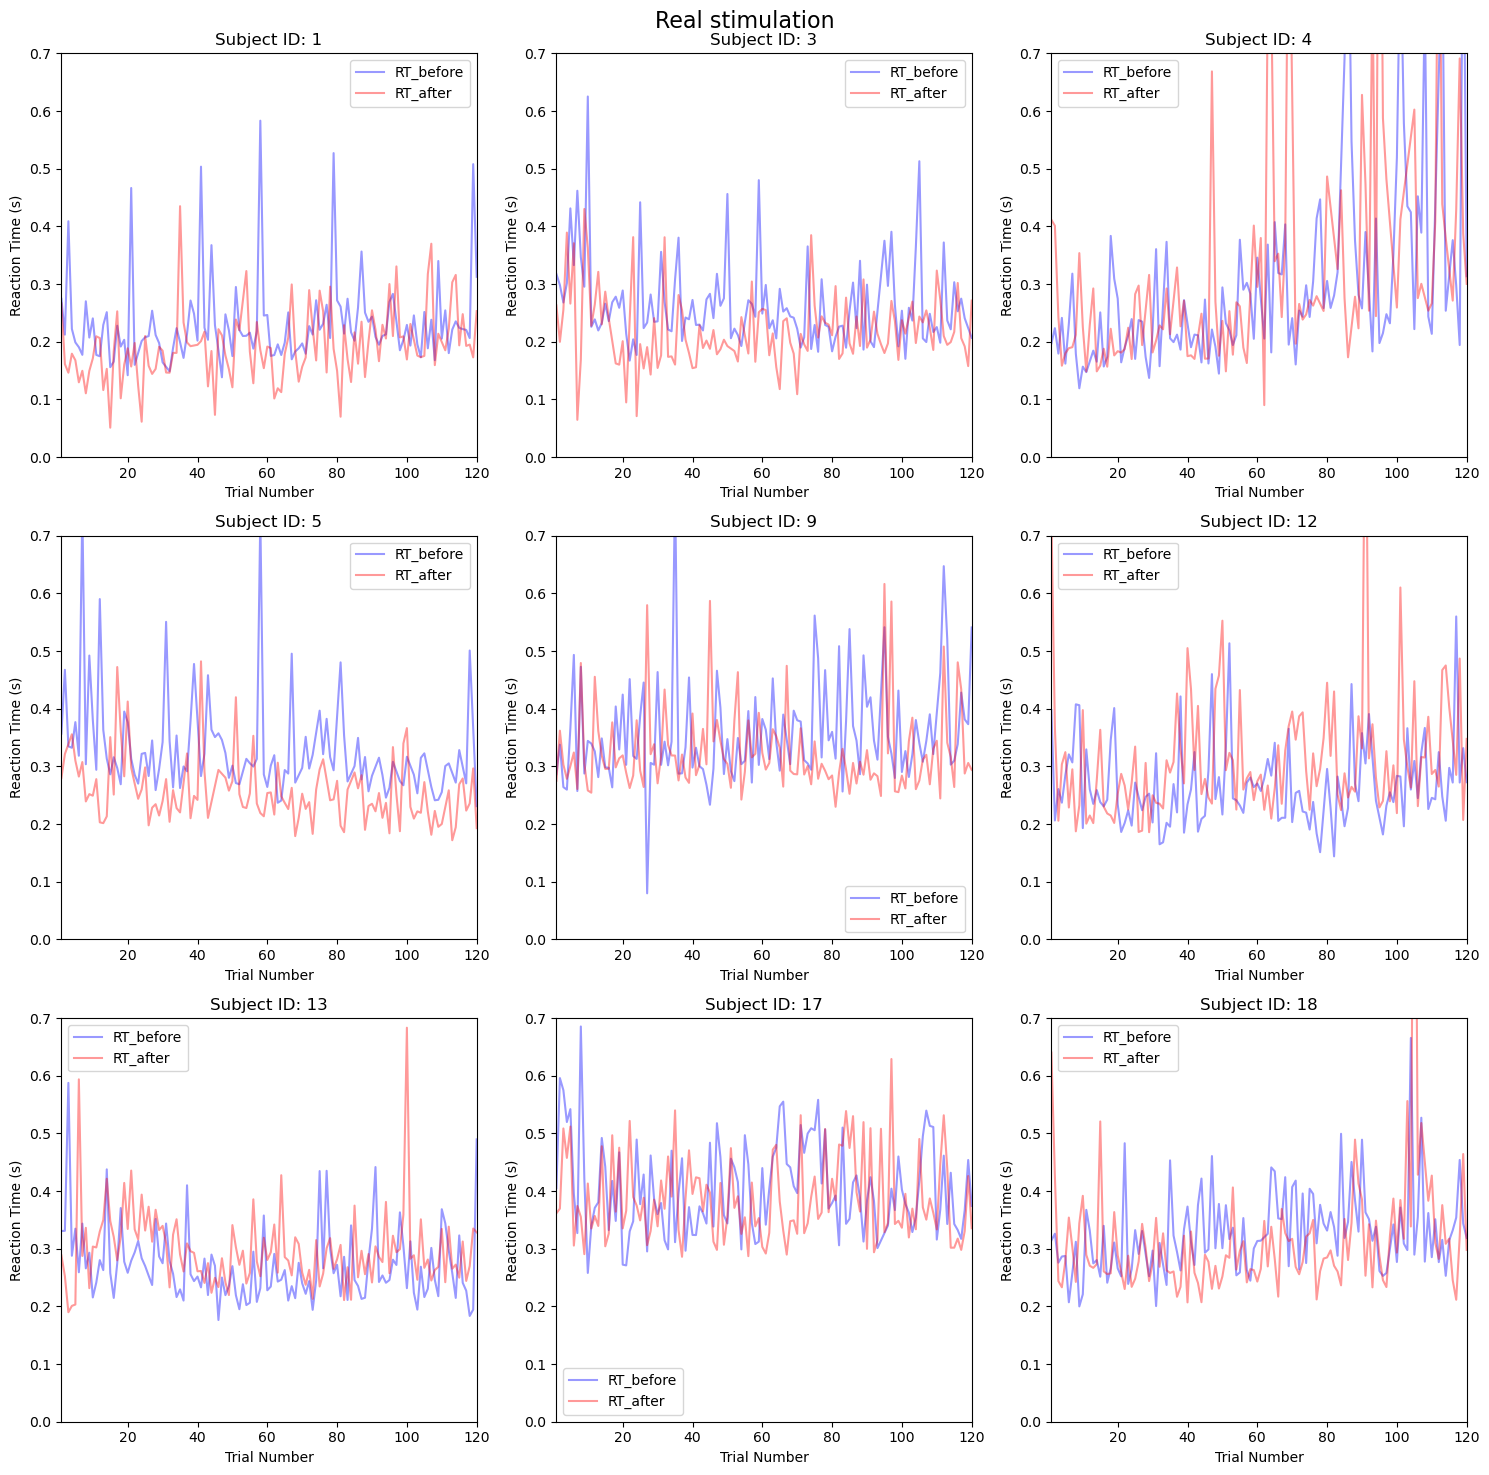

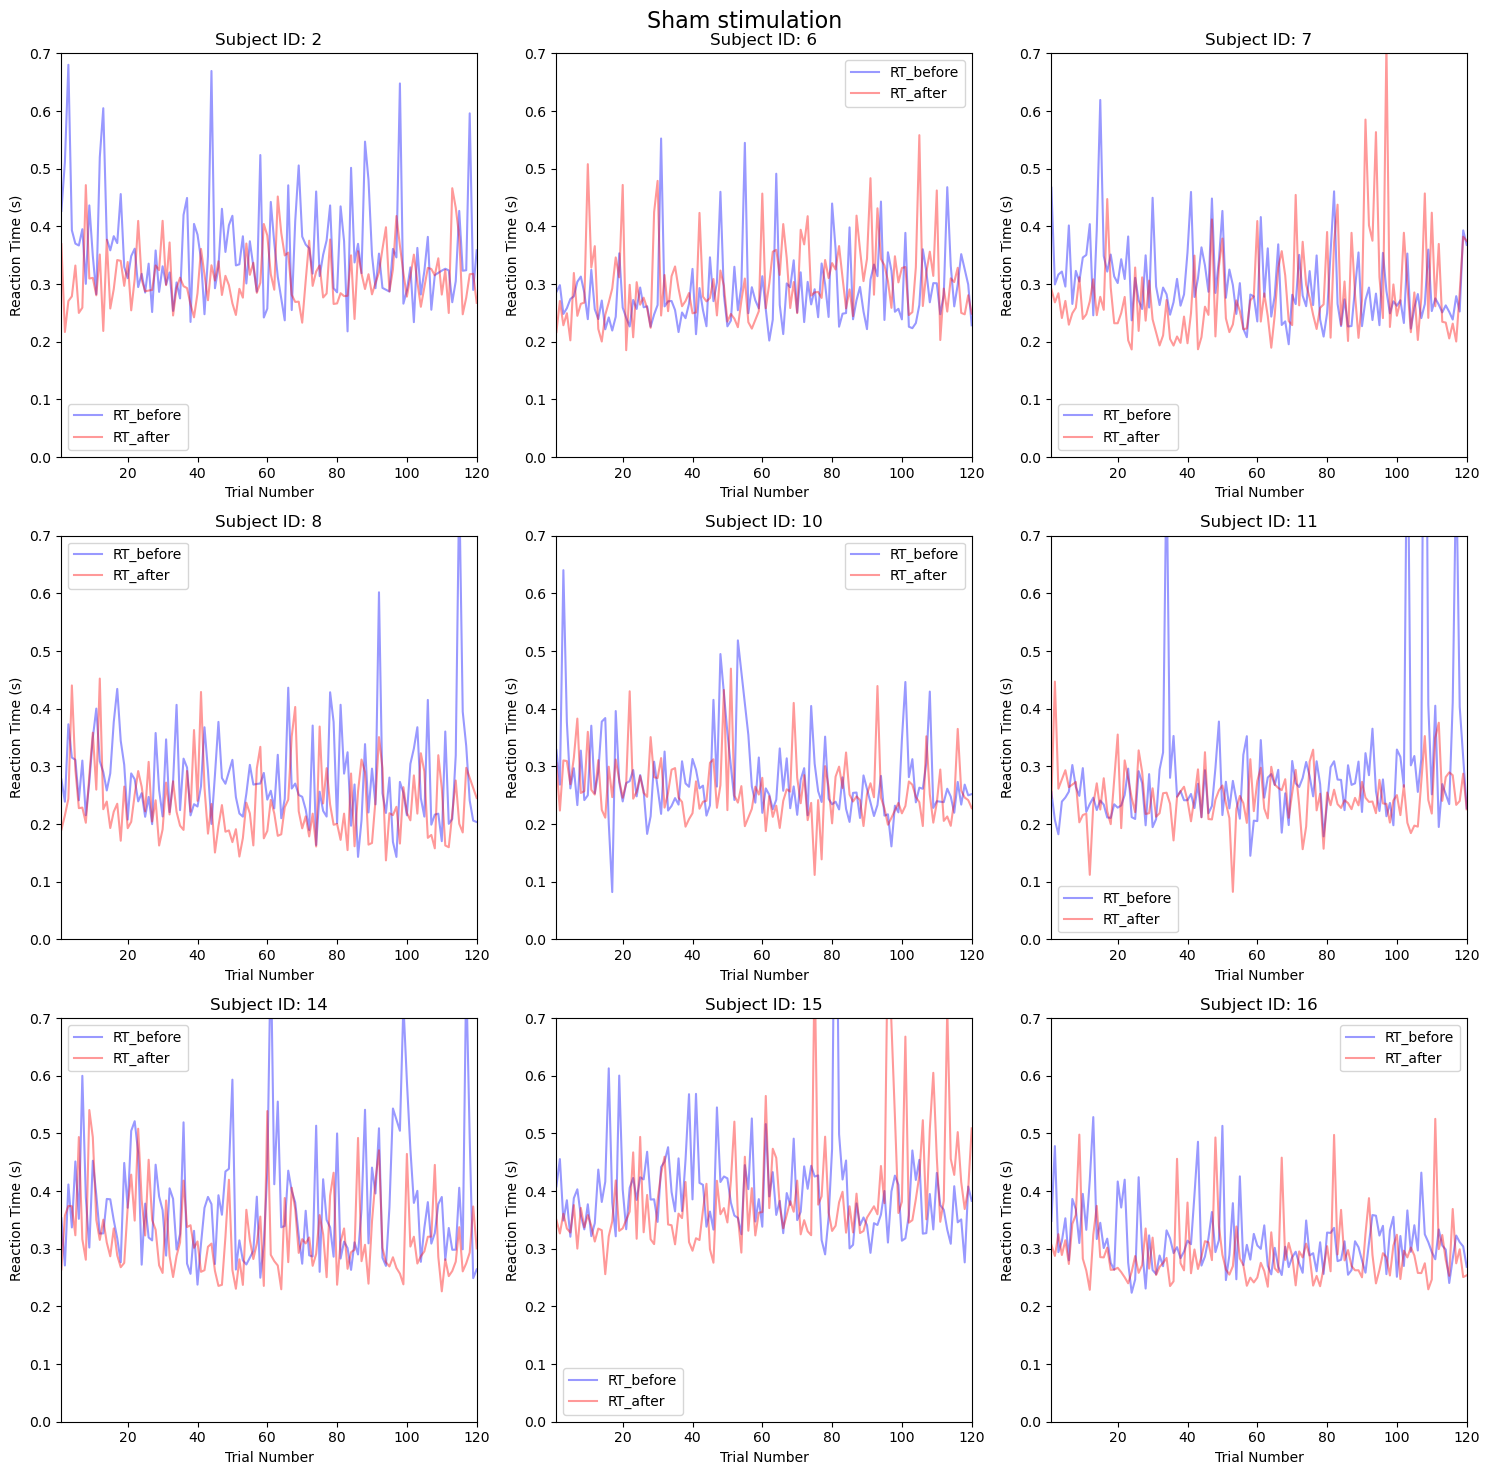

In [15]:
all_real = [1, 3, 4, 5, 9, 12, 13, 17, 18]
all_sham = [2, 6, 7, 8, 10, 11, 14, 15, 16]

xmax = 120
ymax = 0.7 # You can adjust this value depending on the range of reaction times

fig_real, axs_real = plt.subplots(3, 3, figsize=(15, 15))
fig_real.suptitle('Real stimulation', fontsize=16)

axs_real = axs_real.ravel()

fig_sham, axs_sham = plt.subplots(3, 3, figsize=(15, 15))
fig_sham.suptitle('Sham stimulation', fontsize=16)

axs_sham = axs_sham.ravel()

for idx, subject_id in enumerate(all_real):
    behavior_before, behavior_after = fb.load_behavior(subject_id)
    behavior_before = behavior_before[(behavior_before['response'] == 1) & (behavior_before['reaction time'] > 0.05)]
    behavior_after = behavior_after[(behavior_after['response'] == 1) & (behavior_after['reaction time'] > 0.05)]
    RT_before = behavior_before['reaction time']
    RT_after = behavior_after['reaction time']

    # Assuming 'trial' is a column in your DataFrame
    trial_before = behavior_before['trial']
    trial_after = behavior_after['trial']

    axs_real[idx].plot(trial_before, RT_before, color='blue', alpha=0.4, label='RT_before')
    axs_real[idx].plot(trial_after, RT_after, color='red', alpha=0.4, label='RT_after')

    axs_real[idx].set(title=f'Subject ID: {subject_id}', ylabel='Reaction Time (s)', xlabel='Trial Number')
    axs_real[idx].legend()  # Add a legend

    axs_real[idx].set_xlim([1, xmax])
    axs_real[idx].set_ylim([0, ymax])

for idx, subject_id in enumerate(all_sham):
    behavior_before, behavior_after = fb.load_behavior(subject_id)
    behavior_before = behavior_before[(behavior_before['response'] == 1) & (behavior_before['reaction time'] > 0.05)]
    behavior_after = behavior_after[(behavior_after['response'] == 1) & (behavior_after['reaction time'] > 0.05)]
    RT_before = behavior_before['reaction time']
    RT_after = behavior_after['reaction time']

    # Assuming 'trial' is a column in your DataFrame
    trial_before = behavior_before['trial']
    trial_after = behavior_after['trial']

    axs_sham[idx].plot(trial_before, RT_before, color='blue', alpha=0.4, label='RT_before')
    axs_sham[idx].plot(trial_after, RT_after, color='red', alpha=0.4, label='RT_after')

    axs_sham[idx].set(title=f'Subject ID: {subject_id}', ylabel='Reaction Time (s)', xlabel='Trial Number')
    axs_sham[idx].legend()  # Add a legend

    axs_sham[idx].set_xlim([1, xmax])
    axs_sham[idx].set_ylim([0, ymax])

fig_real.tight_layout()
fig_sham.tight_layout()

plt.show()


In [14]:
behavior_before

,trial,type,cue,valid,ICS,stimulus side,stimulus x,stimulus y,response,reaction time
0,1,1,-1,1,1.0,-1,969,73,1,0.34813
1,2,1,1,-1,0.5,-1,1131,0,1,0.47788
2,3,2,1,-1,0.5,-1,1131,220,1,0.29398
3,4,2,1,-1,1.0,-1,969,-220,1,0.31309
4,5,2,1,1,1.0,1,1131,-220,1,0.35274
...,...,...,...,...,...,...,...,...,...,...
115,116,2,-1,1,1.0,-1,1292,-220,1,0.28284
116,117,2,1,1,0.5,1,969,73,1,0.32281
117,118,2,1,1,0.5,1,969,-73,1,0.31136
118,119,2,-1,1,0.5,-1,969,-220,1,0.30394
